# Imports

In [1]:
from scipy.stats import norm
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import uproot
import pickle
import pandas as pd
import numpy as np
%matplotlib inline

# Load Data:

In [2]:
eventsWithReg_EB = pd.read_pickle("eventsWithReg_EB.pkl")
xtest = pd.read_pickle("xtest.pkl")
ytest = pd.read_pickle("ytest.pkl")

# Definitions:

In [3]:
Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int = [0,1,2,3,4,5,10,50,100,200,1000]
def Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 2
    if n == 2:
        lowPt = 2
        highPt = 3
    if n == 3:
        lowPt = 3
        highPt = 4
    if n == 4:
        lowPt = 4
        highPt = 5
    if n == 5:
        lowPt = 5
        highPt = 10
    if n == 6:
        lowPt = 10
        highPt = 50
    if n == 7:
        lowPt = 50
        highPt = 100
    if n == 8:
        lowPt = 100
        highPt = 1000
    if n == 9:
        lowPt = 1000
        highPt = 10000
    
    return lowPt, highPt    

In [4]:
Ptrange_0_1_10_100_1000_int = [0,1,10,100,1000]
def Ptrange_0_1_10_100_1000(n):
    if n == 0:
        lowPt = 0
        highPt = 1
    if n == 1:
        lowPt = 1
        highPt = 10
    if n == 2:
        lowPt = 10
        highPt = 100
    if n == 3:
        lowPt = 100
        highPt = 1000
    
    return lowPt, highPt   

# Variables:

In [5]:

'''regVarsEB = eventsWithReg_EB[["clusrawE", "clusIetaIx", "clusIphiIy", "ietamod20", "iphimod20", "nhits_mod"]]
tgtvar = eventsWithReg_EB[["genEnergy"]]

regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]'''

regVarsEB = xtest
tgtvar = ytest

regVarsEB = regVarsEB[:10000]
tgtvar = tgtvar[:10000]


# Loading models and making predicitons:

In [6]:
NSVR = pickle.load(open('NSVR_model.sav', 'rb'))
SVR = pickle.load(open('SVR_model.sav', 'rb'))
XGBR = pickle.load(open('XGBR_model.sav', 'rb'))
HGBR = pickle.load(open('HGBR_model.sav', 'rb'))
ADA = pickle.load(open('ADA_model.sav', 'rb'))
KNR = pickle.load(open('KNR_model.sav', 'rb'))
RFR = pickle.load(open('RFR_model.sav', 'rb'))
ETR = pickle.load(open('ETR_model.sav', 'rb'))

ypred_NSVR = NSVR.predict(regVarsEB)
ypred_SVR = SVR.predict(regVarsEB)
ypred_XGBR = XGBR.predict(regVarsEB, ntree_limit=XGBR.best_ntree_limit)
ypred_HGBR = HGBR.predict(regVarsEB)
ypred_ADA = ADA.predict(regVarsEB)
ypred_KNR = KNR.predict(regVarsEB)
ypred_RFR = RFR.predict(regVarsEB)
ypred_ETR = ETR.predict(regVarsEB)

C:\Users\jonla\anaconda4\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


# Creating Dataframe:

In [7]:
genPt = eventsWithReg_EB["genPt"][:10000]
genEta = eventsWithReg_EB["genEta"][:10000]
response = eventsWithReg_EB["response"][:10000]
tgtvar_og = eventsWithReg_EB["tgtvar"][:10000]
clusrawE = eventsWithReg_EB["clusrawE"][:10000]
cluscorrE = eventsWithReg_EB["cluscorrE"][:10000]
clusPt = eventsWithReg_EB["clusPt"][:10000]
genEnergy = eventsWithReg_EB["genEnergy"][:10000]
e91X = eventsWithReg_EB["e91X"][:10000]
events = np.arange(0,10000,1)

rawDivGen = np.divide(clusrawE, genEnergy)
e91XDivGen = np.divide(e91X, genEnergy)
xgbrDivGen = np.divide(ypred_XGBR, genEnergy)
nsvrDivGen = np.divide(ypred_NSVR, genEnergy)
corrDivGen = np.divide(cluscorrE, genEnergy)
svrDivGen = np.divide(ypred_SVR, genEnergy)
hgbrDivGen = np.divide(ypred_HGBR, genEnergy)
adaDivGen = np.divide(ypred_ADA, genEnergy)
knrDivGen = np.divide(ypred_KNR, genEnergy)
rfrDivGen = np.divide(ypred_RFR, genEnergy)
etrDivGen = np.divide(ypred_ETR, genEnergy)


In [31]:
df = pd.DataFrame({
    'events':events,
    'genPt':genPt,
    'genEta':genEta,
    'clusPt':clusPt,
    'clusrawE':clusrawE,
    'cluscorrE':cluscorrE,
    #'xgbr_Energy':ypred_xgbr,
    'e91X' :e91X,
    'genEnergy':genEnergy,
    'rawDivGen':rawDivGen,
    'e91XDivGen':e91XDivGen,
    'xgbrDivGen':xgbrDivGen,
    'nsvrDivGen':nsvrDivGen,
    'svrDivGen':svrDivGen,
    'hgbrDivGen':hgbrDivGen,
    'adaDivGen':adaDivGen,
    'knrDivGen':knrDivGen,
    'rfrDivGen':rfrDivGen,
    'etrDivGen':etrDivGen,
    'corrDivGen':corrDivGen
})
df[['rawDivGen','e91XDivGen','xgbrDivGen','nsvrDivGen','svrDivGen','hgbrDivGen','adaDivGen','knrDivGen','rfrDivGen','etrDivGen','corrDivGen',]]


,rawDivGen,e91XDivGen,xgbrDivGen,nsvrDivGen,svrDivGen,hgbrDivGen,adaDivGen,knrDivGen,rfrDivGen,etrDivGen,corrDivGen
222833,0.754547,0.921263,1.174265,2.086938,1.684678,1.333346,16.973889,1.110929,9.700124,1.193916,0.923682
1451123,0.992160,1.006745,6.587340,6.150538,6.150819,7.100810,7.007177,6.448355,7.771743,6.520691,1.008018
160277,0.899390,1.045797,53.483635,52.907764,52.861297,53.209980,53.127807,52.386673,37.661092,53.338747,1.046894
1872499,1.003433,1.006651,0.525911,0.525390,0.524464,0.531417,0.583934,0.542342,0.760301,0.520974,1.007880
1756071,0.982644,0.992047,0.028911,0.024413,0.024101,0.029436,0.204633,0.031762,0.116942,0.029942,0.992623
...,...,...,...,...,...,...,...,...,...,...,...
2350119,0.928874,0.955525,0.097784,0.132436,0.113811,0.099594,0.498229,0.094735,0.284724,0.098802,0.959041
2271254,0.950489,0.979281,0.086091,0.046892,0.053053,0.078584,0.669116,0.072472,0.382382,0.077497,0.980757
2067353,0.944243,0.994553,11.514346,11.555038,11.468980,11.510035,12.605275,11.275101,10.892328,11.615875,0.995674
1757020,0.990068,0.995649,0.609833,0.609823,0.612075,0.618817,0.625366,0.615924,1.057727,0.616125,0.996234


# create columns which bins corrE/genE for each regression

In [30]:
df['binned_corrDivGen'] = pd.cut(df['corrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_e91XDivGen'] = pd.cut(df['e91XDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_nsvrDivGen'] = pd.cut(df['nsvrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_xgbrDivGen'] = pd.cut(df['xgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_svrDivGen'] = pd.cut(df['svrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_hgbrDivGen'] = pd.cut(df['hgbrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_adaDivGen'] = pd.cut(df['adaDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_knrDivGen'] = pd.cut(df['knrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_rfrDivGen'] = pd.cut(df['rfrDivGen'], bins = np.arange(.6,1.8,.01))
df['binned_etrDivGen'] = pd.cut(df['etrDivGen'], bins = np.arange(.6,1.8,.01))

,events,genPt,genEta,clusPt,clusrawE,cluscorrE,e91X,genEnergy,rawDivGen,e91XDivGen,...,binned_nsvrDivGen,binned_xgbrDivGen,binned_svrDivGen,binned_hgbrDivGen,binned_adaDivGen,binned_knrDivGen,binned_rfrDivGen,binned_etrDivGen,binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int,binned_genPt_0_1_10_100_1000_int
222833,0,3.340448,-0.207746,2.534165,2.575110,3.152334,3.144079,3.412791,0.754547,0.921263,...,NaN,"(1.17, 1.18]","(1.68, 1.69]","(1.33, 1.34]",NaN,"(1.11, 1.12]",NaN,"(1.19, 1.2]",3,1
1451123,1,115.614449,-1.218410,114.517334,210.919922,214.291016,214.020386,212.586517,0.992160,1.006745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3
160277,2,5.855867,1.134906,5.349181,9.038552,10.520913,10.509887,10.049644,0.899390,1.045797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1
1872499,3,427.050110,0.567973,433.161072,499.512756,501.726288,501.114441,497.803711,1.003433,1.006651,...,NaN,NaN,NaN,NaN,NaN,NaN,"(0.76, 0.77]",NaN,9,3
1756071,4,170.482620,-1.093963,169.353729,278.170746,280.995605,280.832428,283.083832,0.982644,0.992047,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350119,9995,83.932037,-0.851817,80.820549,107.998856,111.506393,111.097572,116.268600,0.928874,0.955525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2
2271254,9996,57.009525,0.978874,53.446087,82.288010,84.908409,84.780708,86.574402,0.950489,0.979281,...,NaN,NaN,NaN,NaN,"(0.66, 0.67]",NaN,NaN,NaN,7,2
2067353,9997,33.532665,0.268366,31.420218,32.810020,34.597141,34.558174,34.747448,0.944243,0.994553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2
1757020,9998,237.227081,-0.969866,238.053131,354.270538,356.476837,356.267395,357.824432,0.990068,0.995649,...,"(0.6, 0.61]","(0.6, 0.61]","(0.61, 0.62]","(0.61, 0.62]","(0.62, 0.63]","(0.61, 0.62]","(1.05, 1.06]","(0.61, 0.62]",9,3


# create columns which bin genPt

In [10]:
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = Ptrange_0_1_2_3_4_5_10_50_100_1000_10000_int
div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int = np.array(div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int)
df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_2_3_4_5_10_50_100_1000_10000_int, labels = ['0','1','2','3','4','5','6','7','8','9'])

div_bins_0_1_10_100_1000_int = Ptrange_0_1_10_100_1000_int
div_bins_0_1_10_100_1000_int = np.array(div_bins_0_1_10_100_1000_int)
df['binned_genPt_0_1_10_100_1000_int'] = pd.cut(df['genPt'], bins = div_bins_0_1_10_100_1000_int, labels = ['0','1','2','3'])

# separate genPt bins into separate lists and concatenate those lists into a dictionary "dict_of_genPt_lists":

In [25]:
dict_of_genPt_lists_1 = []
for i in range(0,10):
    dict_of_genPt_lists_1.append(df[df['binned_genPt_0_1_2_3_4_5_10_50_100_1000_10000_int'] == str(i)])
    
dict_of_genPt_lists_2 = []
for i in range(0,10):
    dict_of_genPt_lists_2.append(df[df['binned_genPt_0_1_10_100_1000_int'] == str(i)])

# Histograms:

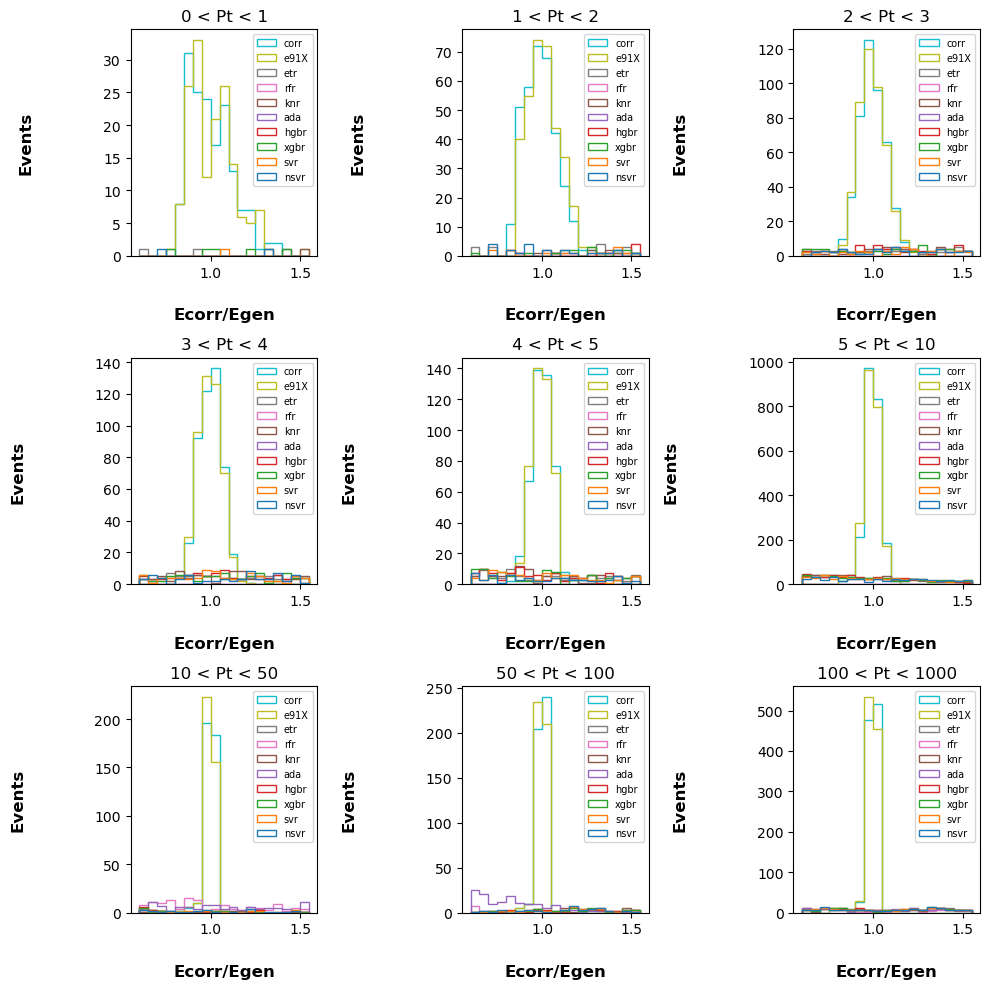

In [26]:

list_of_lists = []

fig, ax = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append(
        [dict_of_genPt_lists_1[i]['nsvrDivGen'],
        dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        dict_of_genPt_lists_1[i]['hgbrDivGen'],
        dict_of_genPt_lists_1[i]['adaDivGen'],
        dict_of_genPt_lists_1[i]['knrDivGen'],
        dict_of_genPt_lists_1[i]['rfrDivGen'],
        dict_of_genPt_lists_1[i]['etrDivGen'],
        dict_of_genPt_lists_1[i]['e91XDivGen'],
        dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = ["nsvr","svr", "xgbr","hgbr", "ada", "knr", "rfr", "etr", "e91X", "corr"]
    count, bins, ignored = ax[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax[b,a].legend(prop={'size':7})
    
    
    ax[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(df_lol.iloc[i,2])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]
    
    
plt.savefig("reg_comp_hist.pdf")

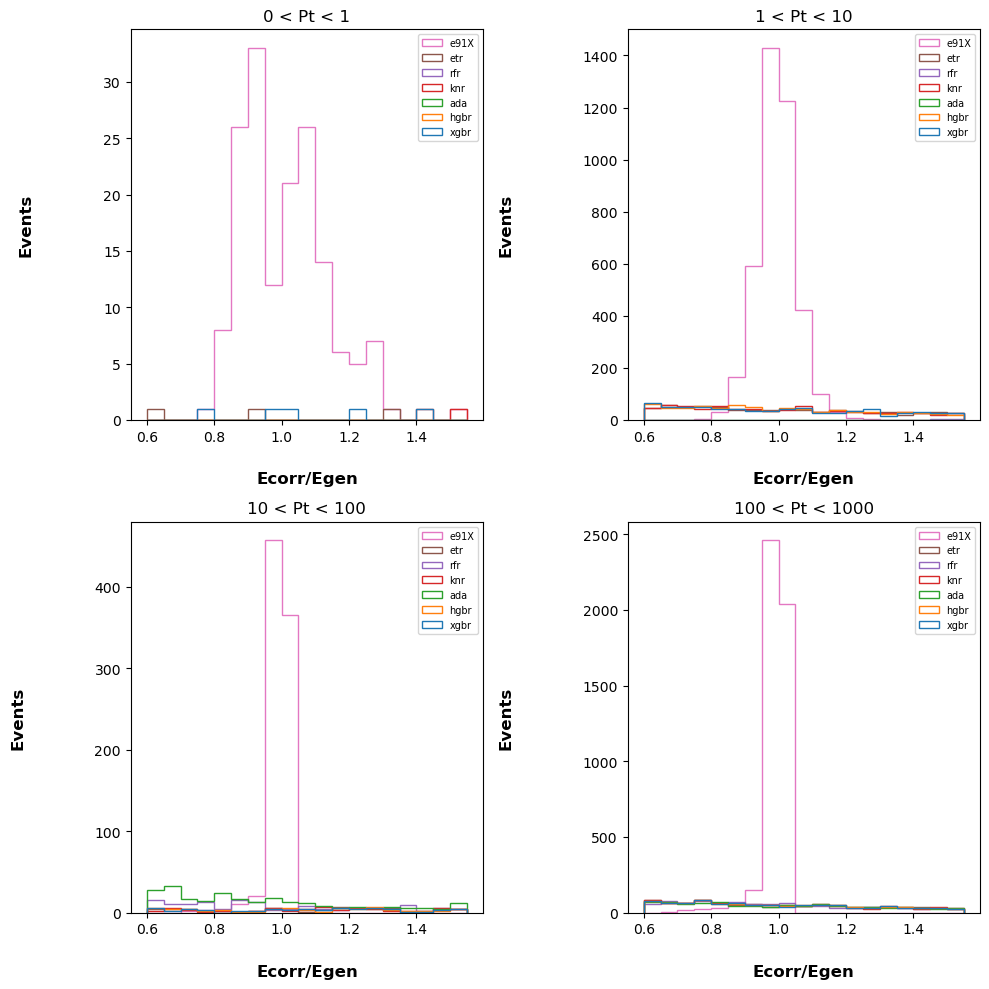

In [27]:
list_of_lists = []

fig, ax1 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_2[i]['nsvrDivGen'],
        #dict_of_genPt_lists_2[i]['svrDivGen'], 
        dict_of_genPt_lists_2[i]['xgbrDivGen'],
        dict_of_genPt_lists_2[i]['hgbrDivGen'],
        dict_of_genPt_lists_2[i]['adaDivGen'],
        dict_of_genPt_lists_2[i]['knrDivGen'],
        dict_of_genPt_lists_2[i]['rfrDivGen'],
        dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        #"nsvr",
        #"svr", 
        "xgbr",
        "hgbr", 
        "ada", 
        "knr", 
        "rfr", 
        "etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax1[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax1[b,a].legend(prop={'size':7})
    
    
    ax1[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax1[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax1[b,a].set_title((str(Ptrange_0_1_10_100_1000(i)[0]) + " < Pt < " + str(Ptrange_0_1_10_100_1000(i)[1])))
    
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(df_lol.iloc[i,2])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]
    
plt.savefig("reg_comp_hist.pdf")

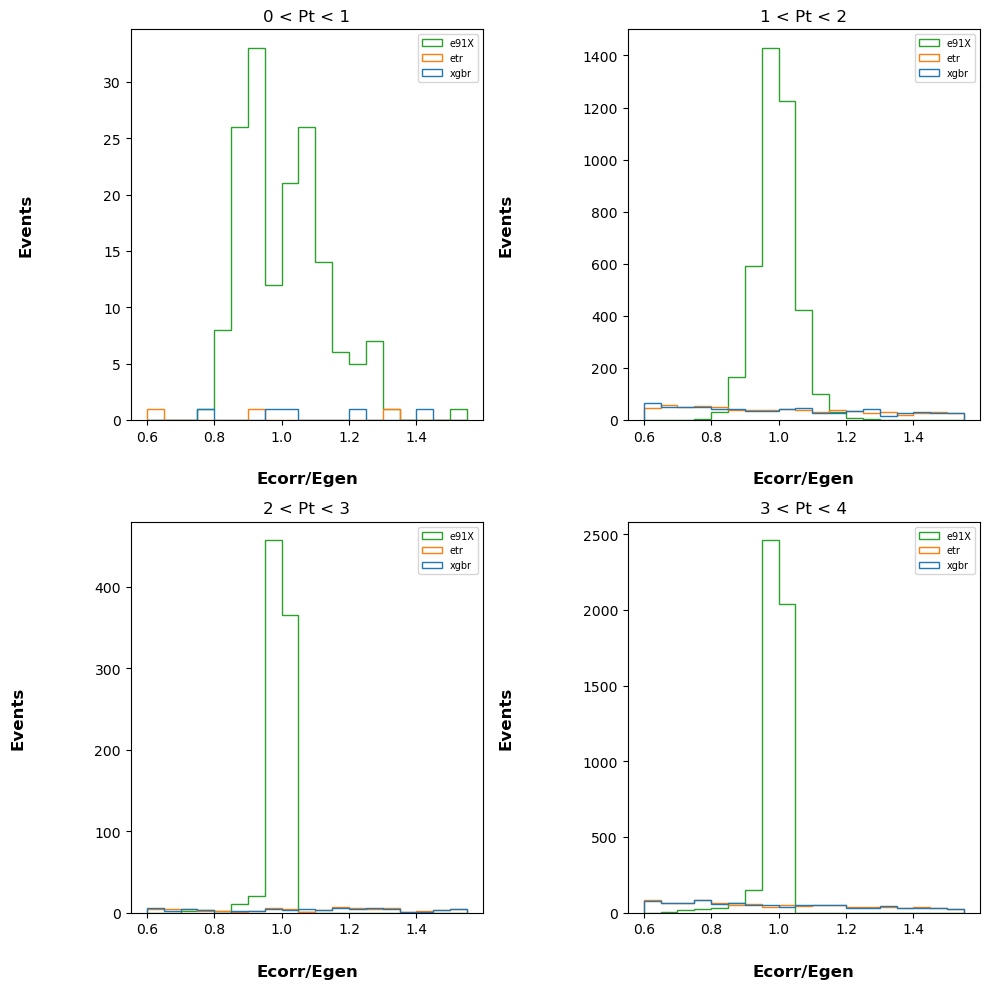

In [28]:
list_of_lists = []

fig, ax2 = plt.subplots(2,2, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(4):    
    a = i%2
    b = (i - (i%2))/2 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        #dict_of_genPt_lists_2[i]['nsvrDivGen'],
        #dict_of_genPt_lists_2[i]['svrDivGen'], 
        dict_of_genPt_lists_2[i]['xgbrDivGen'],
        #dict_of_genPt_lists_2[i]['hgbrDivGen'],
        #dict_of_genPt_lists_2[i]['adaDivGen'],
        #dict_of_genPt_lists_2[i]['knrDivGen'],
        #dict_of_genPt_lists_2[i]['rfrDivGen'],
        dict_of_genPt_lists_2[i]['etrDivGen'],
        dict_of_genPt_lists_2[i]['e91XDivGen'],
        #dict_of_genPt_lists_2[i]['corrDivGen']
        ])
    
    
   
    labels = [
        #"nsvr",
        #"svr", 
        "xgbr",
        #"hgbr", 
        #"ada", 
        #"knr", 
        #"knr", 
        #"rfr", 
        "etr", 
        "e91X", 
        #"corr"
        ]

    count, bins, ignored = ax2[b,a].hist(list_of_lists[i], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax2[b,a].legend(prop={'size':7})
    
    
    ax2[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax2[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax2[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(df_lol.iloc[i,1])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]
    
plt.savefig("reg_comp_hist.pdf")

# Fitting process:

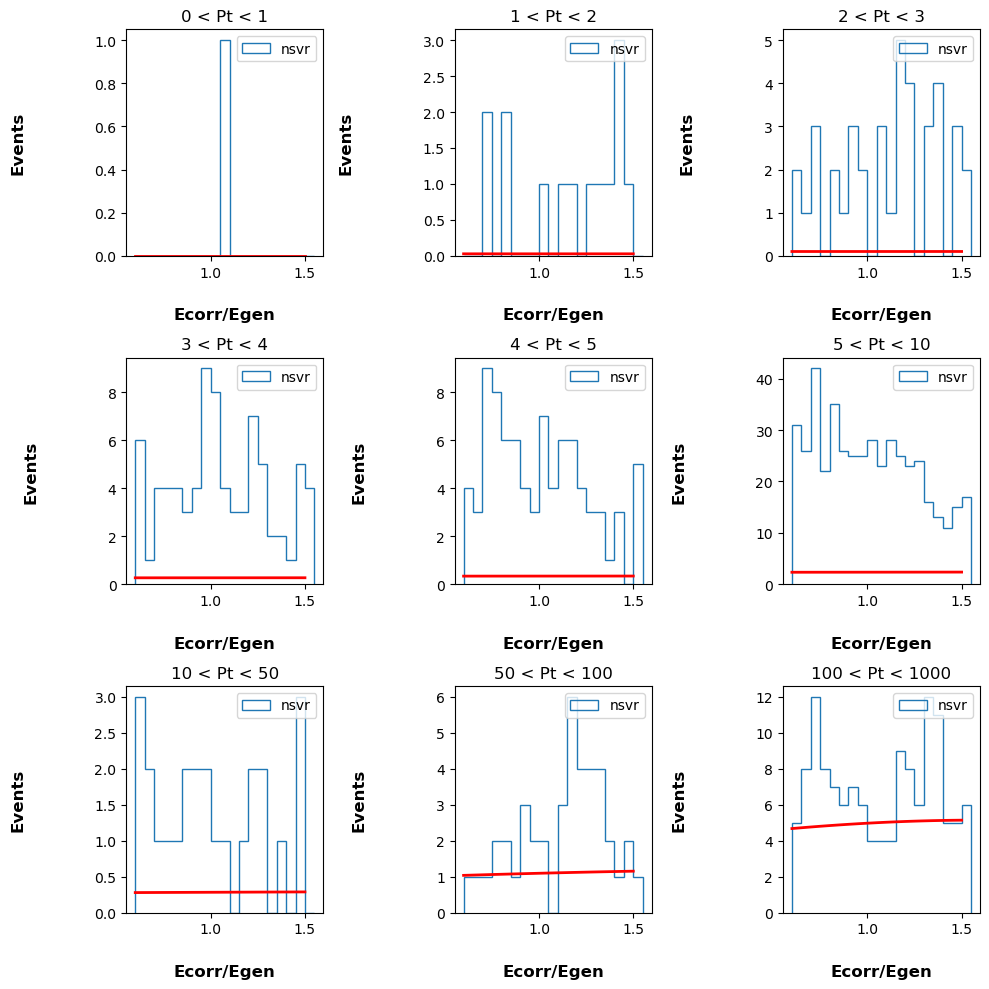

In [29]:

list_of_lists = []

fig, ax3 = plt.subplots(3,3, figsize =(10, 10),sharey=False,tight_layout=True )

for i in range(9):    
    a = i%3
    b = (i - (i%3))/3 
    a = int(a)
    b = int(b)
    
    
    
    list_of_lists.append([
        dict_of_genPt_lists_1[i]['nsvrDivGen'],
        dict_of_genPt_lists_1[i]['svrDivGen'], 
        dict_of_genPt_lists_1[i]['xgbrDivGen'],
        dict_of_genPt_lists_1[i]['hgbrDivGen'],
        dict_of_genPt_lists_1[i]['adaDivGen'],
        dict_of_genPt_lists_1[i]['knrDivGen'],
        dict_of_genPt_lists_1[i]['rfrDivGen'],
        dict_of_genPt_lists_1[i]['etrDivGen'],
        dict_of_genPt_lists_1[i]['e91XDivGen'],
        dict_of_genPt_lists_1[i]['corrDivGen']
        ])
    
    
   
    labels = ["nsvr","svr", "xgbr","hgbr", "ada", "knr", "rfr", "etr", "e91X", "corr"]
    
    count, bins, ignored = ax3[b,a].hist(list_of_lists[i][1], label = labels, histtype='step', bins = np.arange(.6,1.6,0.05))
    
    ax3[b,a].legend(prop={'size':10})
    
    
    ax3[b,a].set_xlabel("Ecorr/Egen", labelpad=20, weight='bold', size=12)
    ax3[b,a].set_ylabel("Events", labelpad=50, weight='bold', size=12)
    ax3[b,a].set_title((str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[0]) + " < Pt < " + str(Ptrange_0_1_2_3_4_5_10_50_100_1000_10000(i)[1])))
    
    
    df_lol = pd.DataFrame(list_of_lists)
    mun, sigma = norm.fit(list_of_lists[i][1])
    count = np.array(count)
    mean = count.mean()
    bins = bins[:-1]

    ax3[b,a].plot(bins, mean*(sigma**.4)*3* (1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mun)**2 / (2 * sigma**2) )), linewidth=2, color='r')

plt.savefig("reg_comp_hist.pdf")